In [1]:
import pandas as pd
import numpy as np

from collections import namedtuple

CoordinatePair = namedtuple("CoordinatePair", ("x_ul", "y_ul", "x_br", "y_br"))
Region = namedtuple("Region", ("index", "area", "bbox", "center", "coords"))


In [3]:
df=pd.read_pickle('../csv/biggest_tissue_mask.pkl')
df

,paths,patient_id,tissue,cat,notes,maj_tissue,size,tokens,strp_punc,1stword,complete_tokens,h,w,biggest_tissue_mask_coords
0,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,GTEX-14DAR-0426,Adipose - Visceral (Omentum),hyperplasia,"2 pieces, ~5% fasca, delineated. Minute focus ...",Adipose,"(55775, 37700)","[pieces, fasca, delineated, Minute, focus, of,...",2 pieces 5 fasca delineated Minute focus of me...,[2],"[2, pieces, fasca, delineated, Minute, focus, ...",55775,37700,"(22730, 4400, 52470, 28700)"
1,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,GTEX-13QBU-0926,Esophagus - Muscularis,clean_specimens,"6 pieces, all muscularis, good specimens",Esophagus,"(71711, 40331)","[pieces, all, muscularis, good, specimens]",6 pieces all muscularis good specimens,[6],"[6, pieces, all, muscularis, good, specimens]",71711,40331,"(48675, 18113, 68906, 36928)"
2,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,GTEX-18QFQ-0326,Muscle - Skeletal,atrophy,2 pieces; skeletal muscle with scant internal ...,Muscle,"(49799, 24496)","[pieces, skeletal, muscle, with, scant, intern...",2 pieces skeletal muscle with scant internal f...,[2],"[2, pieces, skeletal, muscle, with, scant, int...",49799,24496,"(2108, 4618, 20983, 21383)"
3,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,GTEX-139YR-1526,Pancreas,fibrosis,"2 pieces; islets well visualized, focal PanIN-...",Pancreas,"(63743, 37311)","[pieces, islets, well, visualized, focal, PanI...",2 pieces islets well visualized focal PanIN1 s...,[2],"[2, pieces, islets, well, visualized, focal, P...",63743,37311,"(5503, 7202, 34923, 34210)"
4,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,GTEX-R55C-0526,Lung,emphysema,"2 pieces, 10x7 & 8x5 mm; patchy emphysema",Lung,"(39839, 32246)","[pieces, 10x7, 8x5, mm, patchy, emphysema]",2 pieces 10x7 8x5 mm patchy emphysema,[2],"[2, pieces, 10x7, 8x5, mm, patchy, emphysema]",39839,32246,"(17617, 1402, 39138, 20228)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7723,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,GTEX-1GTWX-0626,Lung,congestion,"2 pieces, moderate congestion",Lung,"(41831, 26034)","[pieces, moderate, congestion]",2 pieces moderate congestion,[2],"[2, pieces, moderate, congestion]",41831,26034,"(3002, 5206, 18813, 21427)"
7724,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,GTEX-1AX8Z-2226,Stomach,gastritis,6 pieces: 2 without muscularis; chronic gastritis,Stomach,"(51791, 35651)","[pieces, without, muscularis, chronic, gastritis]",6 pieces 2 without muscularis chronic gastritis,[6],"[6, pieces, without, muscularis, chronic, gast...",51791,35651,"(20736, 17525, 33859, 30643)"
7725,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,GTEX-1J8Q3-1526,Adipose - Subcutaneous,fibrosis,2 pieces; <10% fibrous content,Adipose,"(53783, 38942)","[pieces, 10, fibrous, content]",2 pieces 10 fibrous content,[2],"[2, pieces, 10, fibrous, content]",53783,38942,"(27542, 11011, 49776, 35638)"
7726,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,GTEX-UJHI-0126,Spleen,congestion,"2 pieces, 8x7 & 8x7mm; moderate congestion; di...",Spleen,"(45815, 32790)","[pieces, 8x7, 8x7mm, moderate, congestion, dis...",2 pieces 8x7 8x7mm moderate congestion discre...,[2],"[2, pieces, 8x7, 8x7mm, moderate, congestion, ...",45815,32790,"(23158, 12233, 45313, 30583)"


In [4]:
df.biggest_tissue_mask_coords[0]

CoordinatePair(x_ul=22730, y_ul=4400, x_br=52470, y_br=28700)

<AxesSubplot:ylabel='Frequency'>

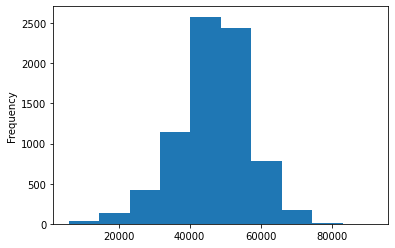

In [5]:
df.h.plot(kind='hist')

In [6]:
from tqdm.notebook import trange, tqdm
import openslide
save_path = '/project/GutIntelligenceLab/ss4yd/gtex_data/biggest_tissues/'

from histolab.tiler import GridTiler
from histolab.slide import Slide
process_path = '/project/GutIntelligenceLab/ss4yd/gtex_data/process_path_level1/'

In [ ]:
# for i in tqdm(range(len(df.paths))):
#     path = df.iloc[i]['paths']
#     name = str(df.iloc[i]['patient_id'])
#     grid_tiles_extractor = GridTiler(
#        tile_size=(256, 256),
#        level=1,
#        check_tissue=True, # default
#        pixel_overlap=0, # default
#        prefix=name+"/", # save tiles in the "grid" subdirectory of slide's processed_path
#        suffix=".png" # default
#     )
    
#     slide = Slide(path, processed_path=process_path)
#     grid_tiles_extractor.extract(slide)

  0%|          | 0/7728 [00:00<?, ?it/s]

In [23]:
piddf = df[['patient_id','paths']]
piddf.columns = ['pid', 'svs_paths']

In [24]:
train, val, test = np.split(piddf.sample(frac=1, random_state=42),\
                                 [int(.75*len(piddf)), int(.9*len(piddf))])

In [25]:
train['dtype']='train'
val['dtype']='val'
test['dtype']='test'

In [26]:
piddf = pd.concat([train,val,test])
piddf.to_csv('../csv/train_test_val_split.csv', index=False)

In [27]:
piddf

,pid,svs_paths,dtype
3328,GTEX-1S82P-0626,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,train
4059,GTEX-11WQC-0626,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,train
5767,GTEX-1LC46-0726,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,train
263,GTEX-UPIC-1026,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,train
2835,GTEX-1KANB-2026,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,train
...,...,...,...
5226,GTEX-18A7A-2326,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,test
5390,GTEX-WYBS-1526,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,test
860,GTEX-U8XE-0126,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,test
7603,GTEX-1A8G6-3026,/project/GutIntelligenceLab/ss4yd/gtex_data/ac...,test
